<a href="https://colab.research.google.com/github/ahmedessam207/head-pose-estimation/blob/master/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

df['Spending_Category'] = (df['Spending Score (1-100)'] > 50).astype(int)

X = df[['Age', 'Annual Income (k$)']]
y = df['Spending_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

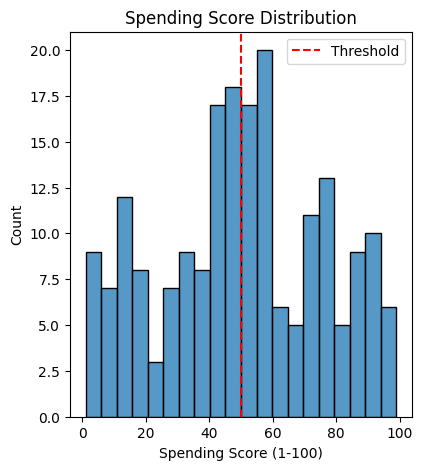

In [ ]:
# Visualizations
plt.figure(figsize=(15, 5))

# 1. Spending Score Distribution
plt.subplot(131)
sns.histplot(data=df, x='Spending Score (1-100)', bins=20)
plt.axvline(x=50, color='r', linestyle='--', label='Threshold')
plt.title('Spending Score Distribution')
plt.legend()

Text(0.5, 1.0, 'Age vs Income by Spending Category')

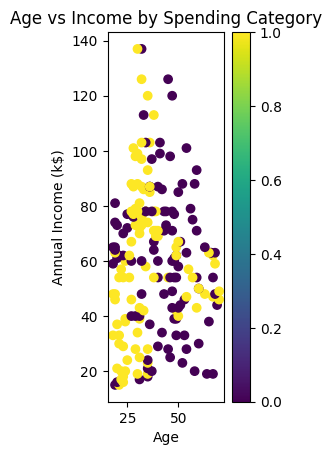

In [ ]:
# 2. Age vs Income colored by Spending Category
plt.subplot(132)
scatter = plt.scatter(df['Age'], df['Annual Income (k$)'],
                     c=df['Spending_Category'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Income by Spending Category')

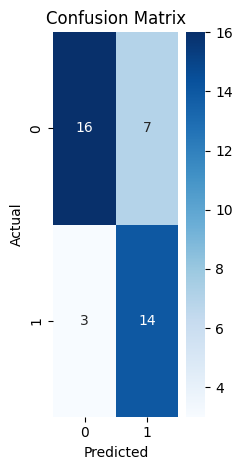

In [ ]:
# 3. Confusion Matrix
plt.subplot(133)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Print classification results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients:")
for feature, coef in zip(['Age', 'Annual Income'], model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.67      0.82      0.74        17

    accuracy                           0.75        40
   macro avg       0.75      0.76      0.75        40
weighted avg       0.77      0.75      0.75        40


Model Coefficients:
Age: -0.5245
Annual Income: 0.0485

Model Accuracy: 0.7500
